In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from cat_analysis.io import (read_trip_file_names,
                            CleanTrip)

In [3]:
files = read_trip_file_names('/home/tom/Documents/code/cats_data')

In [27]:
#1 - multiple measures okay (might have different fields from others...)
#5 - lots of missing data
#6-  HR only

ct = CleanTrip(files[25])

In [28]:
ct.clean()

In [29]:
ct.time_series.head()

,catsid,type,hr_0002-4182,spo2_0002-4bb8,nbps_0002-4a05,nbpd_0002-4a06,nbpm_0002-4a07,abps_0002-4a15,abpd_0002-4a16,abpm_0002-4a17,...,co2_0002-50b0,wecgi,wecgii,wecgiii,wabp,wart,wcvp,wcoo,wpleth,wresp
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-08-29 14:59:20,1,{9},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"""",NaN,"""",NaN,NaN,"""",0.44297924 0.43760684 0.43174603 0.42515263 0....,NaN
2016-08-29 14:59:21,2,"{9, 6}",160.0,98.0,50.0,34.0,39.0,58.0,38.0,47.0,...,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-29 14:59:22,2,"{9, 6}",160.0,98.0,50.0,34.0,39.0,58.0,38.0,47.0,...,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-29 14:59:23,2,"{9, 6}",160.0,98.0,50.0,34.0,39.0,58.0,38.0,46.0,...,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-29 14:59:24,2,"{9, 6}",159.0,98.0,50.0,34.0,39.0,58.0,38.0,46.0,...,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


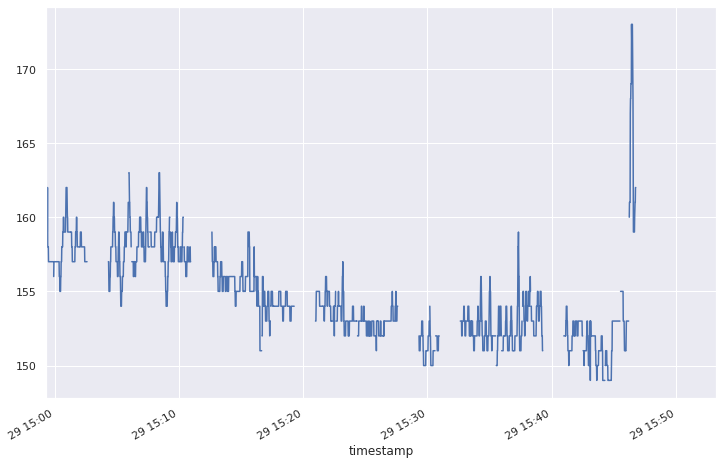

In [32]:
ct.time_series['hr_0002-4182'].plot(figsize=(12,8))

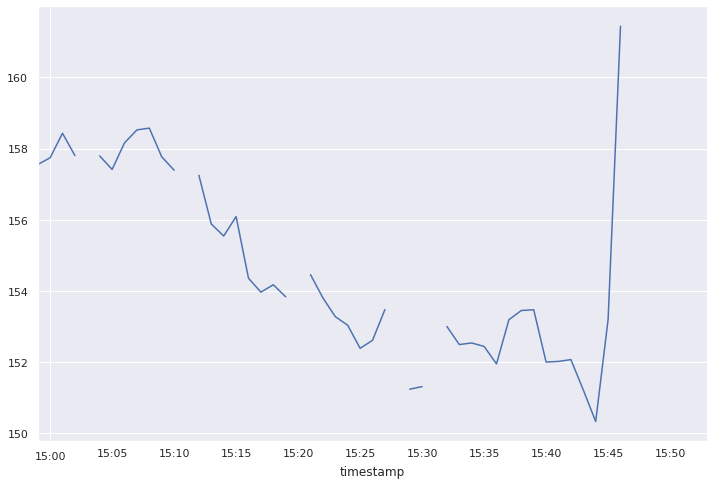

In [31]:
r_ts = ct.resample(rule='60s', interp=False)
r_ts['hr_0002-4182'].plot.line(figsize=(12,8))
r_ts['arts_0002-4a11'].plot.line(figsize=(12,8))
r_ts['tesoph_0002-4b64'].plot.line(figsize=(12,8))

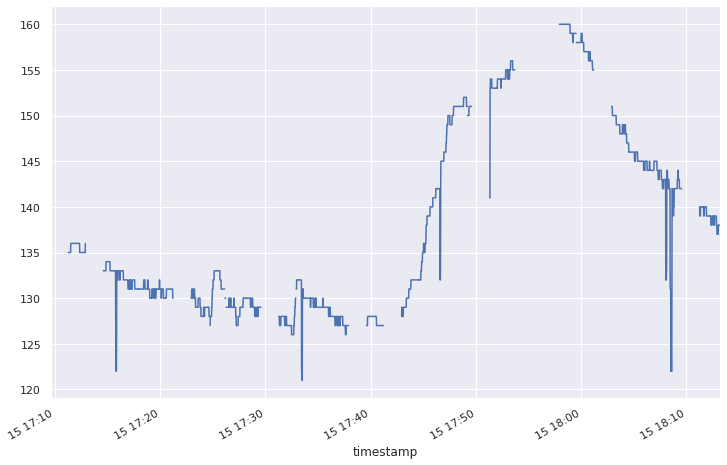

In [25]:
ct.time_series['hr_0002-4182'].plot(figsize=(12,8))